In [34]:
import sqlite3
import pandas

sqlite_file = 'flights.db'
conn = sqlite3.connect(sqlite_file)  # connect to database and ingest the tables 

# Lets list all the tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"

team_list = pandas.read_sql(query, conn)
team_list.head()

,name
0,airports
1,airlines
2,routes


In [35]:
query = "SELECT COUNT(name) FROM airlines WHERE country like 'United States';"

team_list = pandas.read_sql(query, conn)
team_list.head()

,COUNT(name)
0,1080


In [36]:
# Question 1: The number of airlines in the United States is 1080, as printed above.

In [48]:
query = "SELECT * FROM routes WHERE stops >= 1;"

team_list = pandas.read_sql(query, conn)
team_list.head()

,index,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2066,5T,1623,YRT,132,YEK,50,None,1,ATR
1,7810,AC,330,ABJ,253,BRU,302,None,1,333
2,8272,AC,330,YVR,156,YBL,30,None,1,BEH
3,17767,CU,1936,FCO,1555,HAV,1909,None,1,767
4,25116,FL,1316,HOU,3566,SAT,3621,None,1,735


In [38]:
#Question 2: The routes that have one or more stops are found/printed above.

In [66]:
query = "SELECT AL.name, latitude, longitude\
         FROM airlines as AL JOIN airports as AP\
         ON AL.icao=AP.icao\
         WHERE AL.country like 'United States';"
            
team_list = pandas.read_sql(query, conn)
team_list.head()


,name,latitude,longitude
0,Yellow Air Taxi,-0.148056,-66.9858
1,Yellow Air Taxi,-0.245167,36.8849
2,Yellow Air Taxi,-0.5425,-78.3657
3,Yellow Air Taxi,-0.733333,-73.016667
4,Yellow Air Taxi,-1.0102,-77.1501


In [ ]:
#Question 3: Above is the latitude and longitude of all airlines in the 'United States'.

In [56]:
query = "SELECT country, avg(latitude) as AverageLatitude\
         FROM airports\
         GROUP BY country;"
            

team_list = pandas.read_sql(query, conn)
team_list.head()

,country,AverageLatitude
0,Afghanistan,34.079266
1,Albania,41.414742
2,Algeria,32.748186
3,American Samoa,-14.243852
4,Angola,-10.540102


In [ ]:
#Question 4: Above is the average latitude for each country listed in the Airports table.

In [92]:
query = "INSERT INTO routes (airline, airline_id, source, source_id, dest, dest_id, codeshare, stops, equipment) VALUES ('3Z', 555, 'COR', 3432, 'ZZZ', 2342, 'None', 5, 'KKZ');"
team_list = pandas.read_sql(query, conn)
team_list.head()

TypeError: 'NoneType' object is not iterable

In [93]:
#Question 5: I put quotes around the strings and not around the integers but I'm not sure why it's still showing an error. I also tried to put the values as DEFAULT but that didn't work either.

In [49]:
query = "SELECT *\
         FROM airports as A JOIN routes as R \
         ON A.code=R.source\
         WHERE city like 'Los Angeles';"

team_list = pandas.read_sql(query, conn)
team_list.head()

,index,id,name,city,country,code,icao,latitude,longitude,altitude,...,index,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,3385,3484,Los Angeles Intl,Los Angeles,United States,LAX,KLAX,33.942536,-118.408075,126,...,997,4B,\N,LAX,3484,LAS,3877,None,0,PL2
1,3385,3484,Los Angeles Intl,Los Angeles,United States,LAX,KLAX,33.942536,-118.408075,126,...,5690,AA,24,LAX,3484,ABQ,4019,Y,0,CRJ CR7
2,3385,3484,Los Angeles Intl,Los Angeles,United States,LAX,KLAX,33.942536,-118.408075,126,...,5691,AA,24,LAX,3484,ANC,3774,Y,0,737
3,3385,3484,Los Angeles Intl,Los Angeles,United States,LAX,KLAX,33.942536,-118.408075,126,...,5692,AA,24,LAX,3484,AUS,3673,None,0,M83 738
4,3385,3484,Los Angeles Intl,Los Angeles,United States,LAX,KLAX,33.942536,-118.408075,126,...,5693,AA,24,LAX,3484,BDL,3825,None,0,738


In [ ]:
# Question 6: The table above is showing the routes originating from airports in the city of 'Los Angeles'

In [94]:
query = "SELECT latitude, longitude FROM airports WHERE country like 'United States';"

result = pandas.read_sql(query,conn)
result.head()

,latitude,longitude
0,39.6335556,-86.8138056
1,41.9929342,-86.1280125
2,39.9750278,-81.5775833
3,44.8436667,-87.4215556
4,39.7948244,-76.6471914


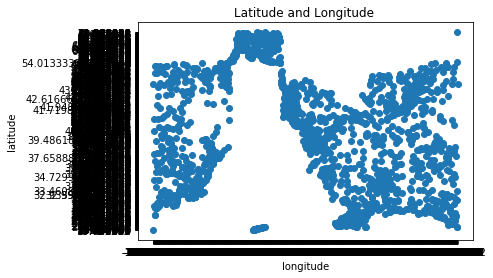

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

query = "SELECT latitude, longitude FROM airports WHERE country like 'United States';"

result = pandas.read_sql(query,conn)
result.head()

plt.title('Latitude and Longitude ')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(result["longitude"],result["latitude"])

In [105]:
#Question 7: Above is a scatterplot of airports on a US map. The latitudes are the horizontal lines so they would be on the y axis. The longitudes are the vertical lines so they would be on the x axis.